# Phone Number Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.fftpack

import IPython.display as ipd
from scipy.io.wavfile import read
from scipy import signal

In [2]:
DTMF_Freqs = np.zeros(12)
DTMF_Freqs[0] = 941 + 1336  # 0
DTMF_Freqs[1] = 697 + 1209  # 1
DTMF_Freqs[2] = 697 + 1336  # 2
DTMF_Freqs[3] = 697 + 1477  # 3
DTMF_Freqs[4] = 770 + 1209  # 4
DTMF_Freqs[5] = 770 + 1336  # 5
DTMF_Freqs[6] = 770 + 1477  # 6
DTMF_Freqs[7] = 852 + 1209  # 7
DTMF_Freqs[8] = 852 + 1336  # 8
DTMF_Freqs[9] = 852 + 1477  # 9
DTMF_Freqs[10] = 941 + 1203  # * (star)
DTMF_Freqs[11] = 941 + 1477  # # (pound)

In [3]:
def FindDTMFDigit(Freqs, Amounts):
    SoundThreshold = 2  # Set a threshold that means that a sound is emitted at that frequency
    FreqError = 10
    FreqGroup = 0
    FreqSpan = 0
    FreqAvg = 0
    FreqNum = 0
    FreqTotal = 0
    
    SampleNum = len(Freqs)

    # Loop through the Fourier transform data and see if any particular frequency exceeds the threshold
    for bin in range(0, SampleNum//2):
        if((2.0/SampleNum*np.abs(Amounts[bin])) > SoundThreshold):  # Frequency exceeds the threshold
            FreqSpan += 1
            FreqGroup += Freqs[bin]
        else:
            if(FreqSpan > 0):  # Just ended a group of frequencies beyond threshold
                FreqAvg = FreqGroup / FreqSpan  # Get the average of the frequencies found to tune in better
                
                if FreqAvg > 696:
                        FreqNum += 1  # Track how many frequencies exceeded the threshold
                        FreqTotal += FreqAvg  # Get the sum of the frequencies found
                        print(f'Found a frequency that exceeded threshold:  {FreqAvg:8.3f} Hz.')
                        
                FreqGroup = 0
                FreqSpan = 0

    print(f'\nThis process found {FreqNum} frequencies that exceeded the threshold.')
    print(f'The frequencies that exceeded threshold totaled {FreqTotal:0.3f} Hz.')

    for i in range(len(DTMF_Freqs)):  # Loop through the DTMF sums to find the digit dialed
        if(np.abs(DTMF_Freqs[i] - FreqTotal) < FreqError):
            # Landed on a unique DTMF sum
            DigitDialed = ''
            if(i <= 9):  # The array bin is the same as the digit
                DigitDialed = str(i)
            elif(i == 10):  # * (star)
                DigitDialed = '* (star)'
            elif(i == 11):  # # (pound)
                DigitDialed = '# (pound)'
            print(f'\nFound the DTMF digit dialed: {DigitDialed}\n')
            
            InitialDialedDigit = DigitDialed
            
#         else:
#             DigitDialed = 'Didnt Find'
    
    return DigitDialed, InitialDialedDigit

In [4]:
def AnalyzeSound(Wav_File, starting_sample = 0, ending_sample = 0):  # Two optional parameters
    sampling_rate, sound_data = read(Wav_File)
    sound_data_samples = len(sound_data)
    
    new_sound_data = np.copy(sound_data)
    if(starting_sample > 0):
        new_sound_data[0: starting_sample + 1] = 0.0    

    if(ending_sample == 0):
        ending_sample = sound_data_samples
    else:
        new_sound_data[ending_sample:] = 0.0
    
    current_samples = ending_sample - starting_sample
    t_current = current_samples / sampling_rate
    
    t_total = sound_data_samples / sampling_rate
    f_nyquist = 0.5 * sampling_rate
    print(f'There are {sound_data_samples} of samples taken with sampling rate of {sampling_rate} Hz for a total time of {t_total:0.4f} seconds.')
    print(f'In this slice there are {current_samples} of samples for a total time of {t_current:0.4f} seconds.')
    print(f'The max frequency (Nyquist frequency) that can be contained in this sample is {f_nyquist} Hz.')
    
    t = np.linspace(0, t_total, sound_data_samples)

#     plt.figure('Bin Domain')
#     plt.title('Bin Domain')
#     plt.xlabel('Bin')
#     plt.ylabel('y (units)')
#     plt.plot(range(0, sound_data_samples), new_sound_data, 'k-')
#     plt.show()
    
#     plt.figure('Time Domain')
#     plt.title('Time Domain')
#     plt.xlabel('t (s)')
#     plt.ylabel('y (units)')
#     plt.plot(t, new_sound_data, 'k-')
#     plt.show()

#     plt.figure('Bin Domain (Zoomed in to Sample)')
#     plt.title('Bin Domain (Zoomed in to Sample)')
#     plt.xlabel('Bin')
#     plt.ylabel('y (units)')
#     plt.plot(range(starting_sample, ending_sample), new_sound_data[starting_sample:ending_sample], 'k-')
#     plt.show()

#     plt.figure('Time Domain (Zoomed in to Sample)')
#     plt.title('Time Domain (Zoomed in to Sample)')
#     plt.xlabel('t (s)')
#     plt.ylabel('y (units)')
#     plt.plot(t[starting_sample:ending_sample], new_sound_data[starting_sample:ending_sample], 'k-')
#     plt.show()

    yf = scipy.fftpack.fft(new_sound_data)  # FFT
    xf = np.linspace(0.0, f_nyquist, int(sound_data_samples/2))  # FFT Frequencies only valid up to Nyquist

#     plt.figure('Frequency Domain')
#     plt.title('Frequency Domain')
#     plt.xlabel('f (Hz)')
#     plt.ylabel('y (units)')
#     plt.plot(xf, 2.0/sound_data_samples * np.abs(yf[:sound_data_samples//2]))
#     plt.show()

#     plt.figure('Frequency Domain (Zoomed in)')
#     plt.title('Frequency Domain (Zoomed in)')
#     plt.xlabel('f (Hz)')
#     plt.ylabel('y (units)')
#     plt.plot(xf[FreqZoomStart:FreqZoomStop], 2.0/sound_data_samples * np.abs(yf[FreqZoomStart:FreqZoomStop]))
#     plt.show()
    
#     plt.figure('Spectrogram')
#     plt.title('Spectrogram of the Sound')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.specgram(sound_data, Fs=sampling_rate)
#     plt.show()
    
#     print(f'xf = {xf}')
#     print(f'yf = {yf}')
    
#     FindDTMFDigit(xf, yf)
    
    MyDigitDialed = FindDTMFDigit(xf, yf)[1]
    
    return MyDigitDialed

# Not Chatty Phone Number Analysis

In [5]:
TimeZoomStart, TimeZoomStop = 250, 5000
FreqZoomStart, FreqZoomStop = 1000, 4000

How_Many_Digits = 10

My_Starting_Sample = np.zeros(How_Many_Digits)
My_Ending_Sample = np.zeros(How_Many_Digits)
My_Found_Number = np.zeros(How_Many_Digits)

Euler_Sampling_Step = 1600

Wav_File = 'phone_call.wav'

for i in range(0, How_Many_Digits): 
# Set both of these to 0 to use the entire sound file
    My_Starting_Sample[i], My_Ending_Sample[i] = 0 + Euler_Sampling_Step * i, 1500 + Euler_Sampling_Step * i
    
    Starting_Sample, Ending_Sample = int(My_Starting_Sample[i]), int(My_Ending_Sample[i])
    
#     AnalyzeSound(Wav_File, Starting_Sample, Ending_Sample)
    
    My_Found_Number[i] = AnalyzeSound(Wav_File, Starting_Sample, Ending_Sample)

    sampling_rate, sound_data = read(Wav_File)
    if(Ending_Sample == 0):
        Ending_Sample = len(sound_data)
    ipd.Audio(sound_data[Starting_Sample: Ending_Sample], rate=sampling_rate)
    
print(f'The phone number found is {int(My_Found_Number[0])}{int(My_Found_Number[1])}{int(My_Found_Number[2])}-{int(My_Found_Number[3])}{int(My_Found_Number[4])}{int(My_Found_Number[5])}-{int(My_Found_Number[6])}{int(My_Found_Number[7])}{int(My_Found_Number[8])}{int(My_Found_Number[9])}')

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.
Found a frequency that exceeded threshold:   852.107 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2188.274 Hz.

Found the DTMF digit dialed: 8

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.
Found a frequency that exceeded threshold:   941.118 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exc

# Chatty Phone Number Analysis

In [6]:
def FindDTMFDigit(Freqs, Amounts):
    SoundThreshold = 2  # Set a threshold that means that a sound is emitted at that frequency
    FreqError = 10
    FreqGroup = 0
    FreqSpan = 0
    FreqAvg = 0
    FreqNum = 0
    FreqTotal = 0
    
    SampleNum = len(Freqs)

    # Loop through the Fourier transform data and see if any particular frequency exceeds the threshold
    for bin in range(0, SampleNum//2):
        if((2.0/SampleNum*np.abs(Amounts[bin])) > SoundThreshold):  # Frequency exceeds the threshold
            FreqSpan += 1
            FreqGroup += Freqs[bin]
        else:
            if(FreqSpan > 0):  # Just ended a group of frequencies beyond threshold
                FreqAvg = FreqGroup / FreqSpan  # Get the average of the frequencies found to tune in better
                
                if FreqAvg > 696:
                        FreqNum += 1  # Track how many frequencies exceeded the threshold
                        FreqTotal += FreqAvg  # Get the sum of the frequencies found
                        print(f'Found a frequency that exceeded threshold:  {FreqAvg:8.3f} Hz.')
                        
                FreqGroup = 0
                FreqSpan = 0

    print(f'\nThis process found {FreqNum} frequencies that exceeded the threshold.')
    print(f'The frequencies that exceeded threshold totaled {FreqTotal:0.3f} Hz.')

    for i in range(len(DTMF_Freqs)):  # Loop through the DTMF sums to find the digit dialed
        if(np.abs(DTMF_Freqs[i] - FreqTotal) < FreqError):
            # Landed on a unique DTMF sum
            DigitDialed = ''
            if(i <= 9):  # The array bin is the same as the digit
                DigitDialed = str(i)
            elif(i == 10):  # * (star)
                DigitDialed = '* (star)'
            elif(i == 11):  # # (pound)
                DigitDialed = '# (pound)'
            print(f'\nFound the DTMF digit dialed: {DigitDialed}\n')
            
            InitialDialedDigit = DigitDialed
            
#         else:
#             DigitDialed = 'Didnt Find'
    
    return DigitDialed, InitialDialedDigit

In [7]:
def AnalyzeSound(Wav_File, starting_sample = 0, ending_sample = 0):  # Two optional parameters
    sampling_rate, sound_data = read(Wav_File)
    sound_data_samples = len(sound_data)
    
    new_sound_data = np.copy(sound_data)
    if(starting_sample > 0):
        new_sound_data[0: starting_sample + 1] = 0.0    

    if(ending_sample == 0):
        ending_sample = sound_data_samples
    else:
        new_sound_data[ending_sample:] = 0.0
    
    current_samples = ending_sample - starting_sample
    t_current = current_samples / sampling_rate
    
    t_total = sound_data_samples / sampling_rate
    f_nyquist = 0.5 * sampling_rate
    print(f'There are {sound_data_samples} of samples taken with sampling rate of {sampling_rate} Hz for a total time of {t_total:0.4f} seconds.')
    print(f'In this slice there are {current_samples} of samples for a total time of {t_current:0.4f} seconds.')
    print(f'The max frequency (Nyquist frequency) that can be contained in this sample is {f_nyquist} Hz.')
    
    t = np.linspace(0, t_total, sound_data_samples)

    plt.figure('Bin Domain')
    plt.title('Bin Domain')
    plt.xlabel('Bin')
    plt.ylabel('y (units)')
    plt.plot(range(0, sound_data_samples), new_sound_data, 'k-')
    plt.show()
    
    plt.figure('Time Domain')
    plt.title('Time Domain')
    plt.xlabel('t (s)')
    plt.ylabel('y (units)')
    plt.plot(t, new_sound_data, 'k-')
    plt.show()

    plt.figure('Bin Domain (Zoomed in to Sample)')
    plt.title('Bin Domain (Zoomed in to Sample)')
    plt.xlabel('Bin')
    plt.ylabel('y (units)')
    plt.plot(range(starting_sample, ending_sample), new_sound_data[starting_sample:ending_sample], 'k-')
    plt.show()

    plt.figure('Time Domain (Zoomed in to Sample)')
    plt.title('Time Domain (Zoomed in to Sample)')
    plt.xlabel('t (s)')
    plt.ylabel('y (units)')
    plt.plot(t[starting_sample:ending_sample], new_sound_data[starting_sample:ending_sample], 'k-')
    plt.show()

    yf = scipy.fftpack.fft(new_sound_data)  # FFT
    xf = np.linspace(0.0, f_nyquist, int(sound_data_samples/2))  # FFT Frequencies only valid up to Nyquist

    plt.figure('Frequency Domain')
    plt.title('Frequency Domain')
    plt.xlabel('f (Hz)')
    plt.ylabel('y (units)')
    plt.plot(xf, 2.0/sound_data_samples * np.abs(yf[:sound_data_samples//2]))
    plt.show()

    plt.figure('Frequency Domain (Zoomed in)')
    plt.title('Frequency Domain (Zoomed in)')
    plt.xlabel('f (Hz)')
    plt.ylabel('y (units)')
    plt.plot(xf[FreqZoomStart:FreqZoomStop], 2.0/sound_data_samples * np.abs(yf[FreqZoomStart:FreqZoomStop]))
    plt.show()
    
    plt.figure('Spectrogram')
    plt.title('Spectrogram of the Sound')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.specgram(sound_data, Fs=sampling_rate)
    plt.show()
    
#     print(f'xf = {xf}')
#     print(f'yf = {yf}')
    
#     FindDTMFDigit(xf, yf)
    
    MyDigitDialed = FindDTMFDigit(xf, yf)[1]
    
    return MyDigitDialed

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


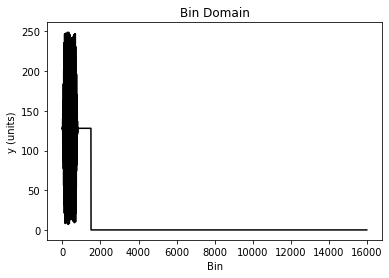

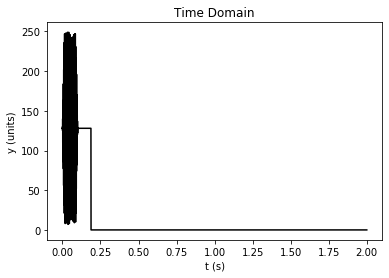

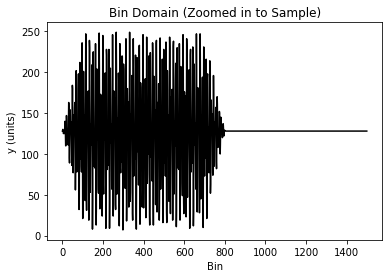

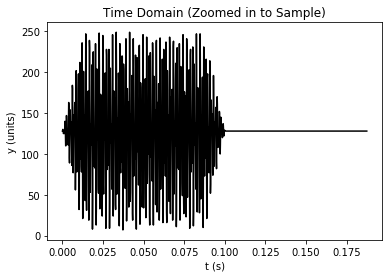

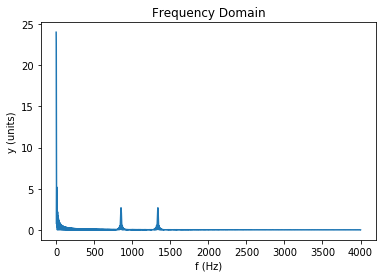

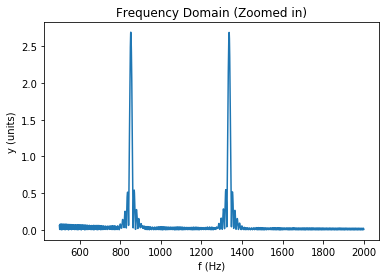

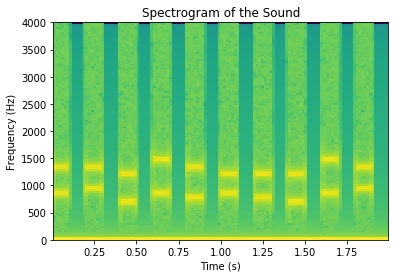

Found a frequency that exceeded threshold:   852.107 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2188.274 Hz.

Found the DTMF digit dialed: 8

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


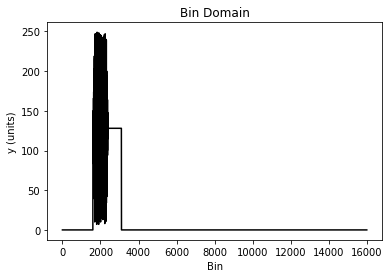

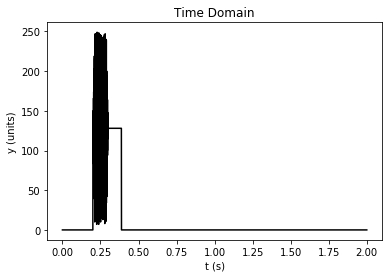

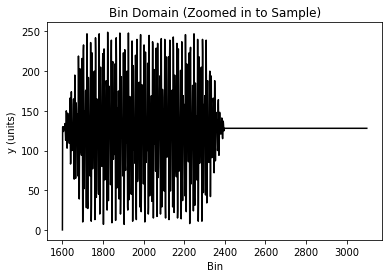

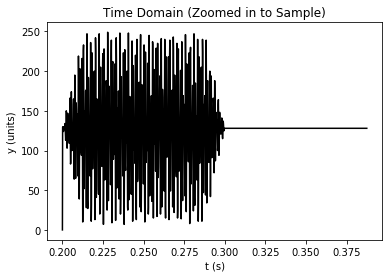

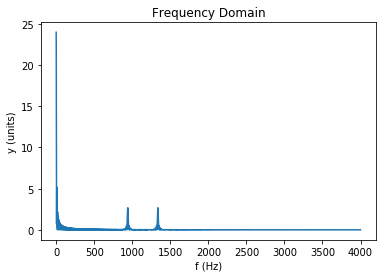

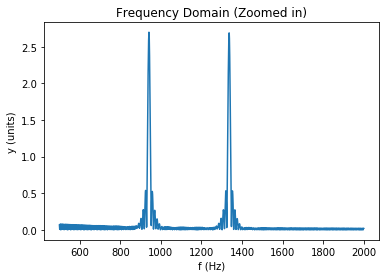

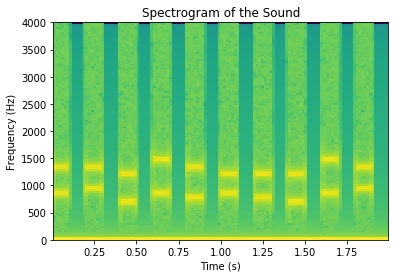

Found a frequency that exceeded threshold:   941.118 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2277.285 Hz.

Found the DTMF digit dialed: 0

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


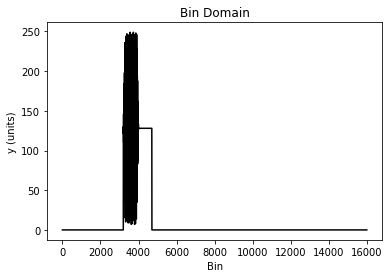

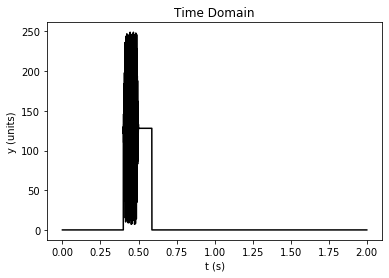

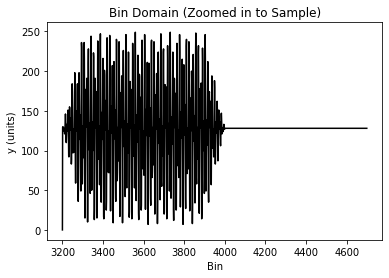

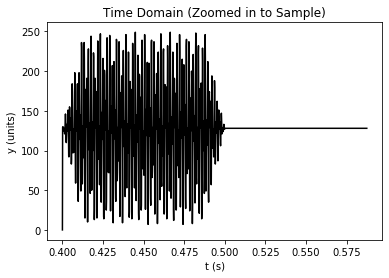

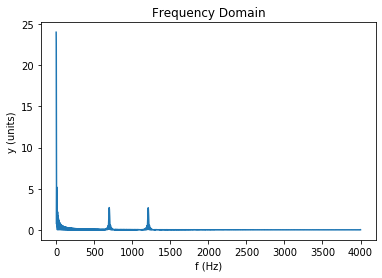

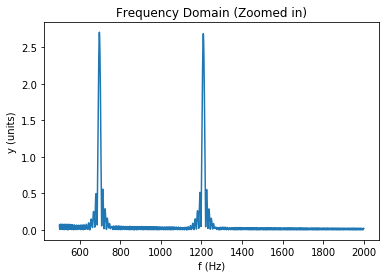

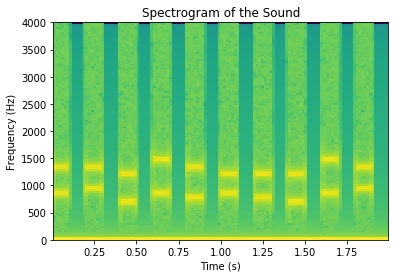

Found a frequency that exceeded threshold:   697.087 Hz.
Found a frequency that exceeded threshold:  1209.151 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 1906.238 Hz.

Found the DTMF digit dialed: 1

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


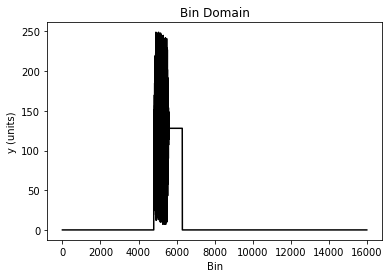

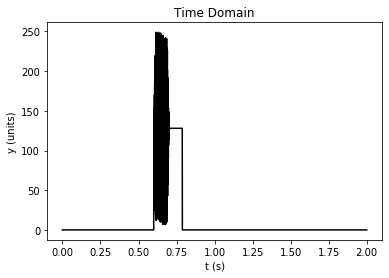

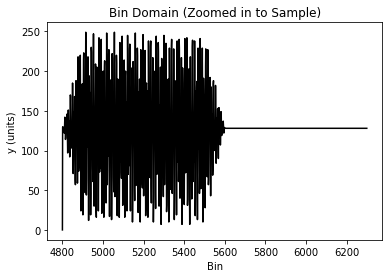

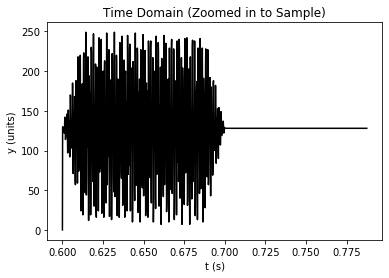

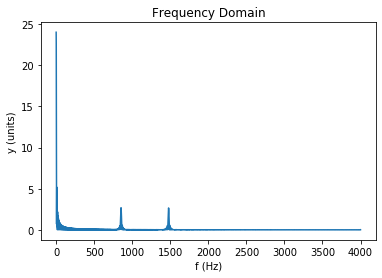

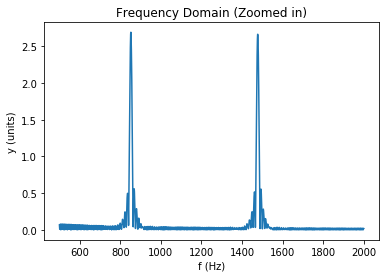

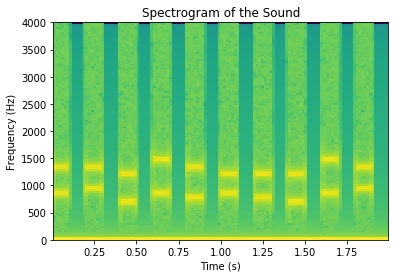

Found a frequency that exceeded threshold:   852.107 Hz.
Found a frequency that exceeded threshold:  1477.185 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2329.291 Hz.

Found the DTMF digit dialed: 9

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


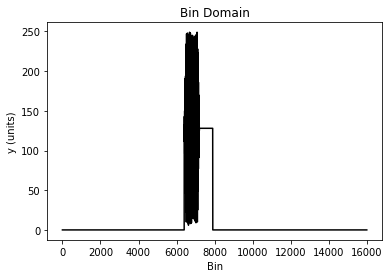

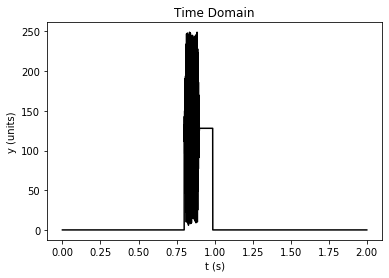

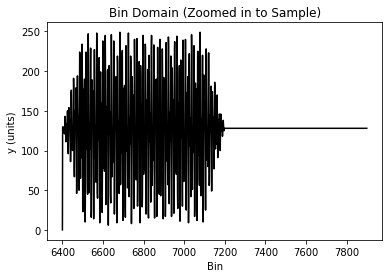

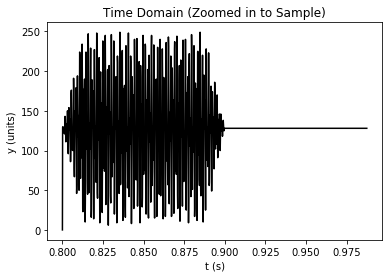

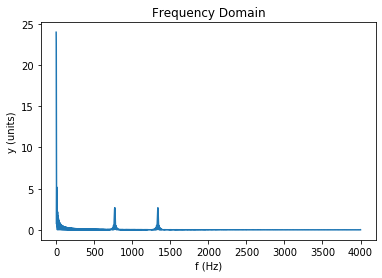

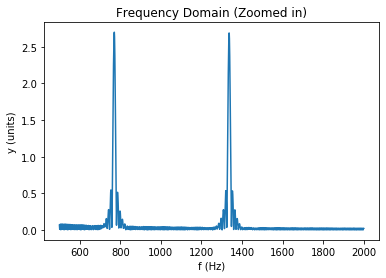

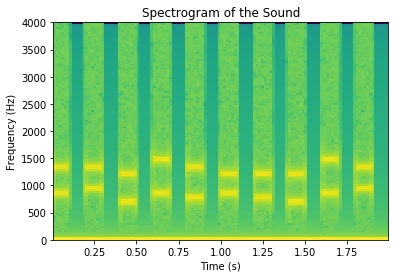

Found a frequency that exceeded threshold:   770.096 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2106.263 Hz.

Found the DTMF digit dialed: 5

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


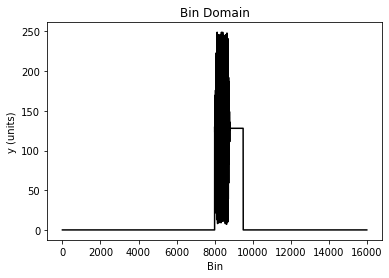

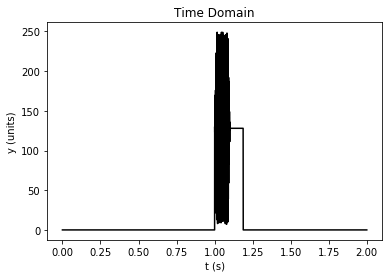

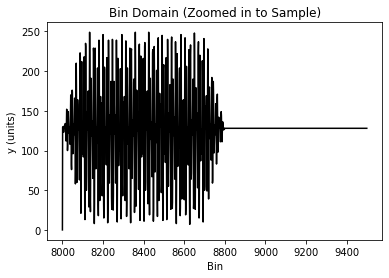

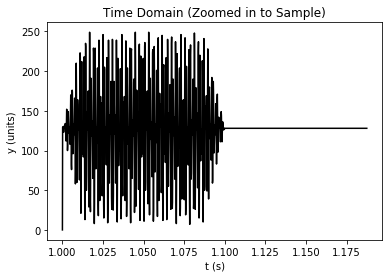

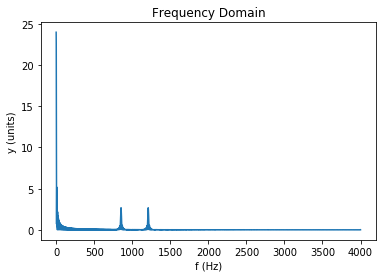

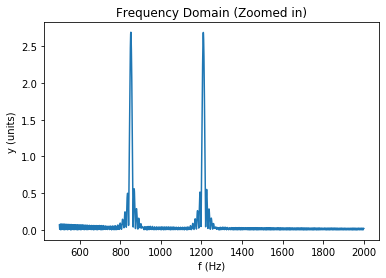

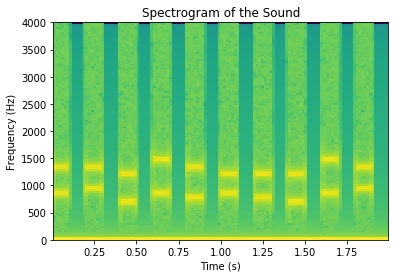

Found a frequency that exceeded threshold:   852.107 Hz.
Found a frequency that exceeded threshold:  1209.151 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2061.258 Hz.

Found the DTMF digit dialed: 7

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


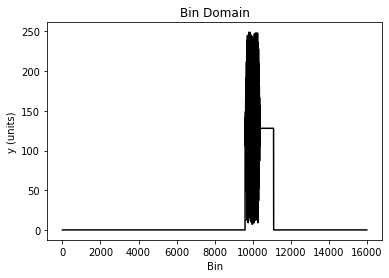

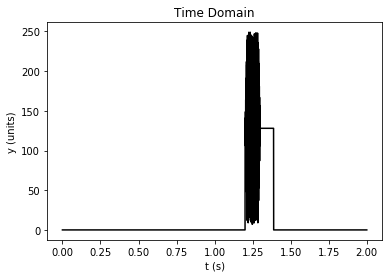

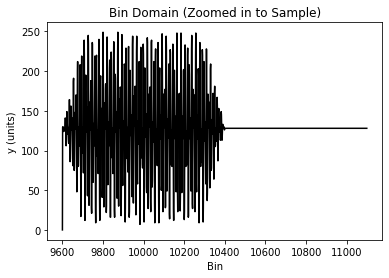

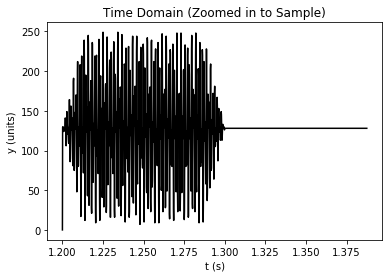

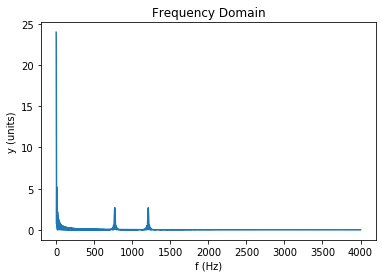

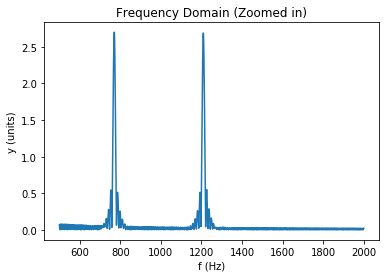

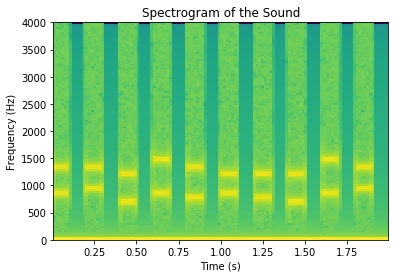

Found a frequency that exceeded threshold:   770.096 Hz.
Found a frequency that exceeded threshold:  1209.151 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 1979.247 Hz.

Found the DTMF digit dialed: 4

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


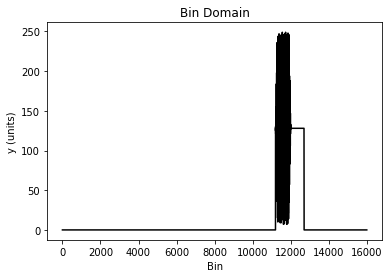

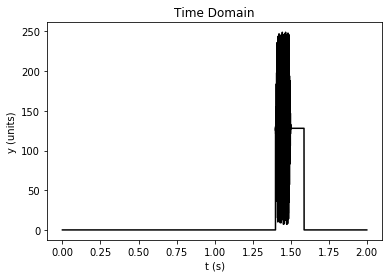

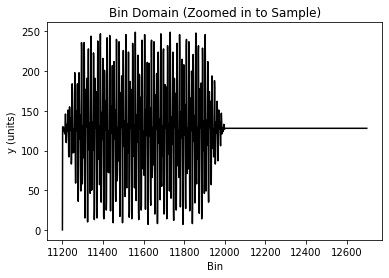

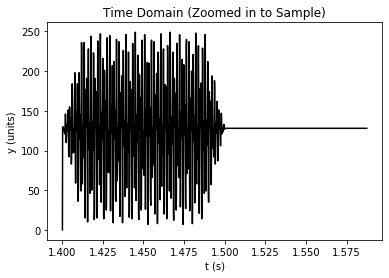

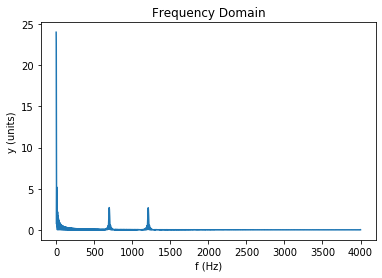

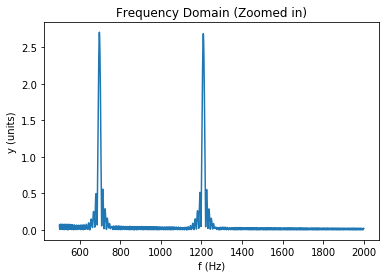

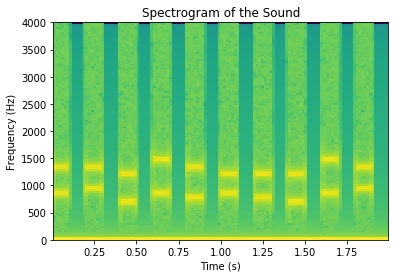

Found a frequency that exceeded threshold:   697.087 Hz.
Found a frequency that exceeded threshold:  1209.151 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 1906.238 Hz.

Found the DTMF digit dialed: 1

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


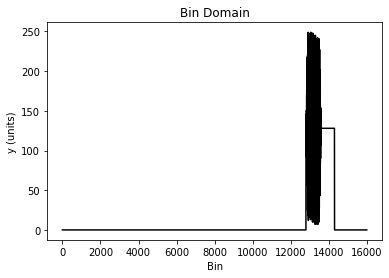

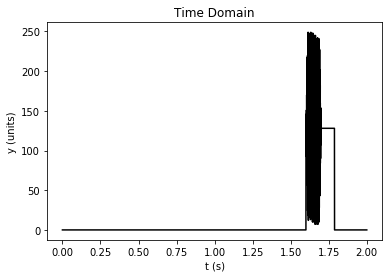

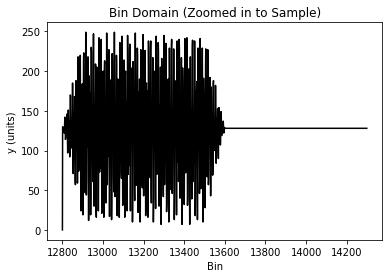

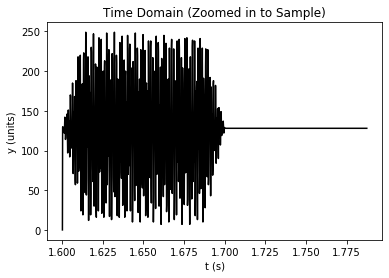

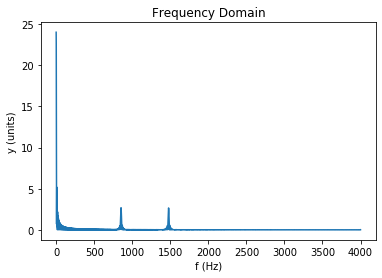

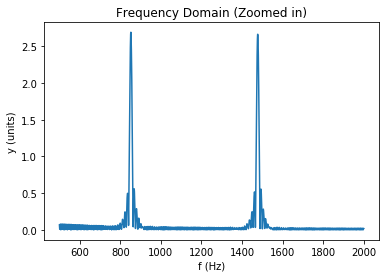

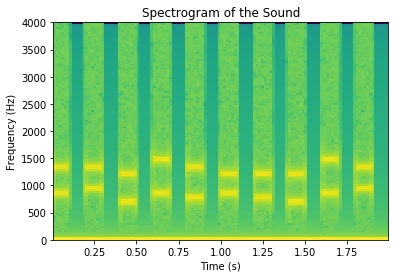

Found a frequency that exceeded threshold:   852.107 Hz.
Found a frequency that exceeded threshold:  1477.185 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2329.291 Hz.

Found the DTMF digit dialed: 9

There are 16000 of samples taken with sampling rate of 8000 Hz for a total time of 2.0000 seconds.
In this slice there are 1500 of samples for a total time of 0.1875 seconds.
The max frequency (Nyquist frequency) that can be contained in this sample is 4000.0 Hz.


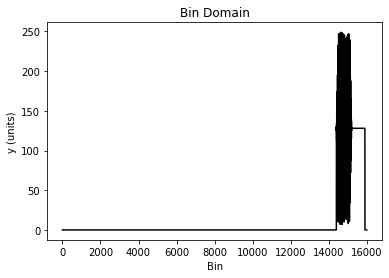

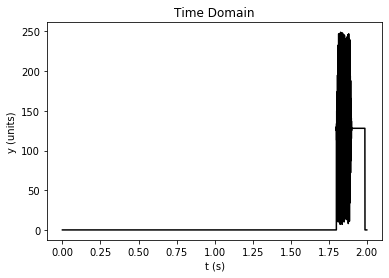

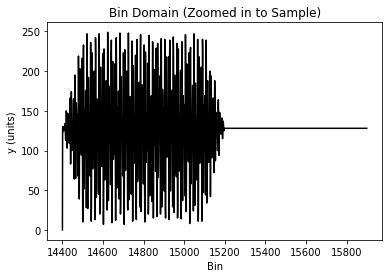

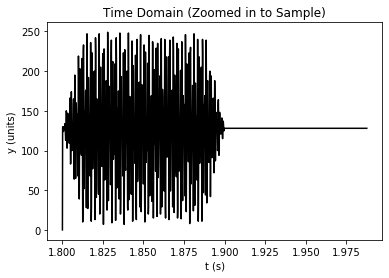

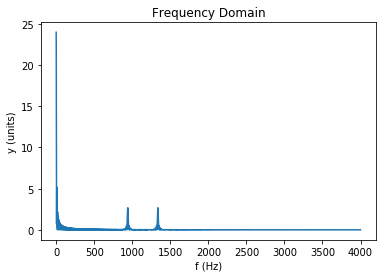

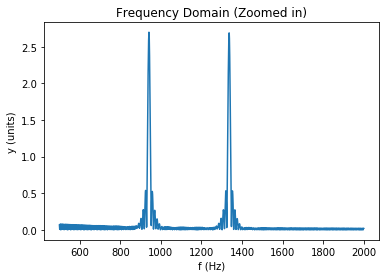

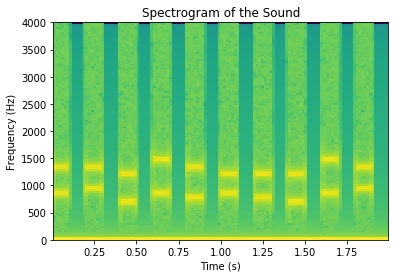

Found a frequency that exceeded threshold:   941.118 Hz.
Found a frequency that exceeded threshold:  1336.167 Hz.

This process found 2 frequencies that exceeded the threshold.
The frequencies that exceeded threshold totaled 2277.285 Hz.

Found the DTMF digit dialed: 0

The found phone number is 801-957-4190


In [8]:
TimeZoomStart, TimeZoomStop = 250, 5000
FreqZoomStart, FreqZoomStop = 1000, 4000

How_Many_Digits = 10

My_Starting_Sample = np.zeros(How_Many_Digits)
My_Ending_Sample = np.zeros(How_Many_Digits)
My_Found_Number = np.zeros(How_Many_Digits)

Euler_Sampling_Step = 1600

Wav_File = 'phone_call.wav'

for i in range(0, How_Many_Digits): 
# Set both of these to 0 to use the entire sound file
    My_Starting_Sample[i], My_Ending_Sample[i] = 0 + Euler_Sampling_Step * i, 1500 + Euler_Sampling_Step * i
    
    Starting_Sample, Ending_Sample = int(My_Starting_Sample[i]), int(My_Ending_Sample[i])
    
#     AnalyzeSound(Wav_File, Starting_Sample, Ending_Sample)
    
    My_Found_Number[i] = AnalyzeSound(Wav_File, Starting_Sample, Ending_Sample)

    sampling_rate, sound_data = read(Wav_File)
    if(Ending_Sample == 0):
        Ending_Sample = len(sound_data)
    ipd.Audio(sound_data[Starting_Sample: Ending_Sample], rate=sampling_rate)
    
print(f'The found phone number found is {int(My_Found_Number[0])}{int(My_Found_Number[1])}{int(My_Found_Number[2])}-{int(My_Found_Number[3])}{int(My_Found_Number[4])}{int(My_Found_Number[5])}-{int(My_Found_Number[6])}{int(My_Found_Number[7])}{int(My_Found_Number[8])}{int(My_Found_Number[9])}')

801-957-4190

8 - (0:800)
0 - (1600:2400)
1 - (3200:4000)

9 - (4800:5400)
5 - (6400:7200)
7 - (8000:8800)

4 - (9600:10400)
1 - (11200:12000)
9 - (12800:13600)
0 - (14400:15200)
